In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import os
import glob
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [28]:
#6103 Group Project
#Example on the HDFCBANK datasets from NYSE and NSE
files = glob.glob("DM stock dataset\ICICIBANK NYSE\*.csv")
dfICNY = []
for f in files:
    csv = pd.read_csv(f)
    dfICNY.append(csv)
dfICNY = pd.concat(dfICNY)

In [29]:
dfNIFTY = pd.read_csv("Dataset updated/NIFTY.csv")
dfNIFTY = dfNIFTY[["Date", "Open", "High", "Low", "Close"]]
dfNIFTY

,Date,Open,High,Low,Close
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000
...,...,...,...,...,...
3181,2022-11-14,18376.400391,18399.449219,18311.400391,18329.150391
3182,2022-11-15,18362.750000,18427.949219,18282.000000,18403.400391
3183,2022-11-16,18398.250000,18442.150391,18344.150391,18409.650391
3184,2022-11-17,18358.699219,18417.599609,18312.949219,18343.900391


In [30]:
dfICNY = dfICNY.reset_index(drop=True)

In [31]:
dfICNY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.910909,7.060000,6.894545,7.047273,6.150249,9864800
1,2010-01-05,6.996364,7.147273,6.978182,7.147273,6.237521,14232900
2,2010-01-06,7.096364,7.127273,7.020000,7.034545,6.139140,16669400
3,2010-01-07,7.052727,7.107273,6.992727,7.018182,6.124861,10411500
4,2010-01-08,6.938182,6.952727,6.840000,6.872727,5.997920,14430900
...,...,...,...,...,...,...,...
3016,2021-12-27,19.430000,19.540001,19.360001,19.490000,19.374544,4633400
3017,2021-12-28,19.500000,19.670000,19.490000,19.540001,19.424250,4276900
3018,2021-12-29,19.500000,19.549999,19.290001,19.430000,19.314901,3192800
3019,2021-12-30,19.500000,19.719999,19.500000,19.650000,19.533596,3080000


In [32]:
files = glob.glob("DM stock dataset\ICICIBANK NSE\*.csv")
dfICN = []
for f in files:
    csv = pd.read_csv(f)
    dfICN.append(csv)
dfICN = pd.concat(dfICN)
dfICN = dfICN.reset_index(drop=True)
dfICN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,159.454544,160.909088,159.090912,159.945450,134.815323,9162186.0
1,2010-01-05,161.454544,163.590912,160.272720,161.463638,136.094971,14659997.0
2,2010-01-06,162.727264,164.972733,161.836365,162.699997,137.137054,20410054.0
3,2010-01-07,163.045456,163.045456,159.363632,161.163635,135.842102,10852286.0
4,2010-01-08,161.654541,161.818176,158.363632,158.899994,133.934128,20580934.0
...,...,...,...,...,...,...,...
2964,2021-12-27,724.000000,738.750000,716.099976,736.000000,731.609619,7955163.0
2965,2021-12-28,740.400024,742.450012,732.500000,735.799988,731.410828,17833655.0
2966,2021-12-29,738.000000,744.950012,731.900024,735.700012,731.311462,7143073.0
2967,2021-12-30,733.299988,740.500000,729.000000,735.700012,731.311462,14326182.0


In [33]:
#For now, I'll drop the the unnecessary features
dfICN = dfICN[["Date","Open","Close", "High", "Low", "Volume"]]
dfICNY = dfICNY[["Date","Open","Close"]]

In [34]:
dfICNY = dfICNY.rename(columns={"Open": "OpenNY", "Close": "CloseNY"})
dfNIFTY = dfNIFTY.rename(columns={"Open": "OpenNIFTY", "Close": "CloseNIFTY", "High": "HighNIFTY", "Low": "LowNIFTY"})

In [35]:
dfIC = dfICNY.merge(dfICN, on = "Date")
dfIC = dfIC.merge(dfNIFTY, on = "Date")
dfIC

,Date,OpenNY,CloseNY,Open,Close,High,Low,Volume,OpenNIFTY,HighNIFTY,LowNIFTY,CloseNIFTY
0,2010-01-04,6.910909,7.047273,159.454544,159.945450,160.909088,159.090912,9162186.0,5200.899902,5238.450195,5167.100098,5232.200195
1,2010-01-05,6.996364,7.147273,161.454544,161.463638,163.590912,160.272720,14659997.0,5277.149902,5288.350098,5242.399902,5277.899902
2,2010-01-06,7.096364,7.034545,162.727264,162.699997,164.972733,161.836365,20410054.0,5278.149902,5310.850098,5260.049805,5281.799805
3,2010-01-07,7.052727,7.018182,163.045456,161.163635,163.045456,159.363632,10852286.0,5281.799805,5302.549805,5244.750000,5263.100098
4,2010-01-08,6.938182,6.872727,161.654541,158.899994,161.818176,158.363632,20580934.0,5264.250000,5276.750000,5234.700195,5244.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2021-12-27,19.430000,19.490000,724.000000,736.000000,738.750000,716.099976,7955163.0,16937.750000,17112.050781,16833.199219,17086.250000
2870,2021-12-28,19.500000,19.540001,740.400024,735.799988,742.450012,732.500000,17833655.0,17177.599609,17250.250000,17161.150391,17233.250000
2871,2021-12-29,19.500000,19.430000,738.000000,735.700012,744.950012,731.900024,7143073.0,17220.099609,17285.949219,17176.650391,17213.599609
2872,2021-12-30,19.500000,19.650000,733.299988,735.700012,740.500000,729.000000,14326182.0,17201.449219,17264.050781,17146.349609,17203.949219


In [36]:
def is_positive(k):
    if(k>0):
        return 1
    else:
        return 0    

In [37]:
dfIC['NSEDiff'] = dfIC['Close']-dfIC['Open']
dfIC['NSEDiffHL'] = dfIC['High']-dfIC['Low']
dfIC['NYSEDiff'] = dfIC['CloseNY']-dfIC['OpenNY']
dfIC['NIFTYDiff'] = dfIC['CloseNIFTY']-dfIC['OpenNIFTY']
dfIC['NIFTYDiffHL'] = dfIC['HighNIFTY']-dfIC['LowNIFTY']
dfIC['NYRes'] = dfIC['NYSEDiff'].map(lambda x: is_positive(x))
dfIC['NYRes'] = pd.Categorical(dfIC.NYRes)
dfIC

,Date,OpenNY,CloseNY,Open,Close,High,Low,Volume,OpenNIFTY,HighNIFTY,LowNIFTY,CloseNIFTY,NSEDiff,NSEDiffHL,NYSEDiff,NIFTYDiff,NIFTYDiffHL,NYRes
0,2010-01-04,6.910909,7.047273,159.454544,159.945450,160.909088,159.090912,9162186.0,5200.899902,5238.450195,5167.100098,5232.200195,0.490906,1.818176,0.136364,31.300293,71.350097,1
1,2010-01-05,6.996364,7.147273,161.454544,161.463638,163.590912,160.272720,14659997.0,5277.149902,5288.350098,5242.399902,5277.899902,0.009094,3.318192,0.150909,0.750000,45.950196,1
2,2010-01-06,7.096364,7.034545,162.727264,162.699997,164.972733,161.836365,20410054.0,5278.149902,5310.850098,5260.049805,5281.799805,-0.027267,3.136368,-0.061819,3.649903,50.800293,0
3,2010-01-07,7.052727,7.018182,163.045456,161.163635,163.045456,159.363632,10852286.0,5281.799805,5302.549805,5244.750000,5263.100098,-1.881821,3.681824,-0.034545,-18.699707,57.799805,0
4,2010-01-08,6.938182,6.872727,161.654541,158.899994,161.818176,158.363632,20580934.0,5264.250000,5276.750000,5234.700195,5244.750000,-2.754547,3.454544,-0.065455,-19.500000,42.049805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2021-12-27,19.430000,19.490000,724.000000,736.000000,738.750000,716.099976,7955163.0,16937.750000,17112.050781,16833.199219,17086.250000,12.000000,22.650024,0.060000,148.500000,278.851562,1
2870,2021-12-28,19.500000,19.540001,740.400024,735.799988,742.450012,732.500000,17833655.0,17177.599609,17250.250000,17161.150391,17233.250000,-4.600036,9.950012,0.040001,55.650391,89.099609,1
2871,2021-12-29,19.500000,19.430000,738.000000,735.700012,744.950012,731.900024,7143073.0,17220.099609,17285.949219,17176.650391,17213.599609,-2.299988,13.049988,-0.070000,-6.500000,109.298828,0
2872,2021-12-30,19.500000,19.650000,733.299988,735.700012,740.500000,729.000000,14326182.0,17201.449219,17264.050781,17146.349609,17203.949219,2.400024,11.500000,0.150000,2.500000,117.701172,1


In [38]:
dfIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2874 entries, 0 to 2873
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Date         2874 non-null   object  
 1   OpenNY       2874 non-null   float64 
 2   CloseNY      2874 non-null   float64 
 3   Open         2874 non-null   float64 
 4   Close        2874 non-null   float64 
 5   High         2874 non-null   float64 
 6   Low          2874 non-null   float64 
 7   Volume       2874 non-null   float64 
 8   OpenNIFTY    2866 non-null   float64 
 9   HighNIFTY    2866 non-null   float64 
 10  LowNIFTY     2866 non-null   float64 
 11  CloseNIFTY   2866 non-null   float64 
 12  NSEDiff      2874 non-null   float64 
 13  NSEDiffHL    2874 non-null   float64 
 14  NYSEDiff     2874 non-null   float64 
 15  NIFTYDiff    2866 non-null   float64 
 16  NIFTYDiffHL  2866 non-null   float64 
 17  NYRes        2874 non-null   category
dtypes: category(1), float64(16),

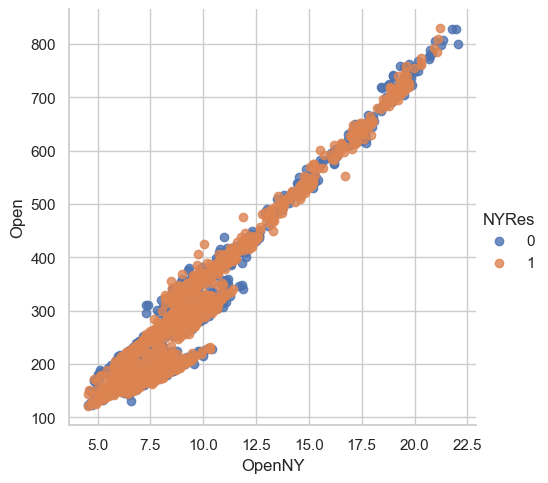

In [39]:
#sns.pairplot(dfICM, hue='NYRes')
sns.set(style='whitegrid')
#ICIC = sns.load_dataset("dfIC")
#seaborn.scatterplot(x="timepoint",y="signal", hue="region",style="event",data=fmri)
sns.lmplot(x = 'OpenNY', y = 'Open', data=dfIC, hue = "NYRes", fit_reg=False)

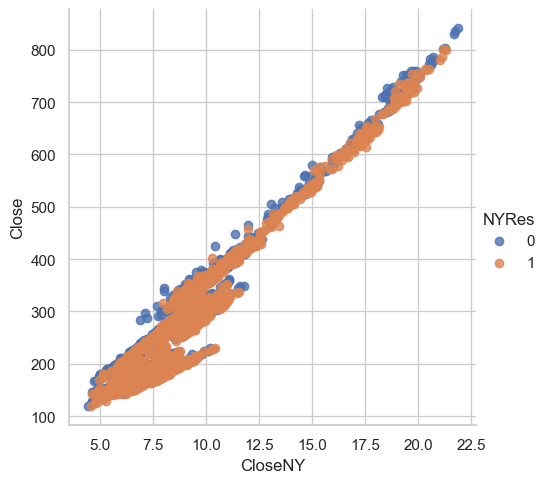

In [40]:
sns.lmplot(x = 'CloseNY', y = 'Close', data=dfIC, hue = "NYRes", fit_reg=False)

In [41]:
#sns.pairplot(dfICM, hue='NYRes')
#plt.scatter(dfICM['OpenNY'], dfICM['OPEN'])
#plt.show()
#Pair plots don't give much information, everything seems to be jumbled together. 
#The NYSERatio covariate seems to be normally distributed.

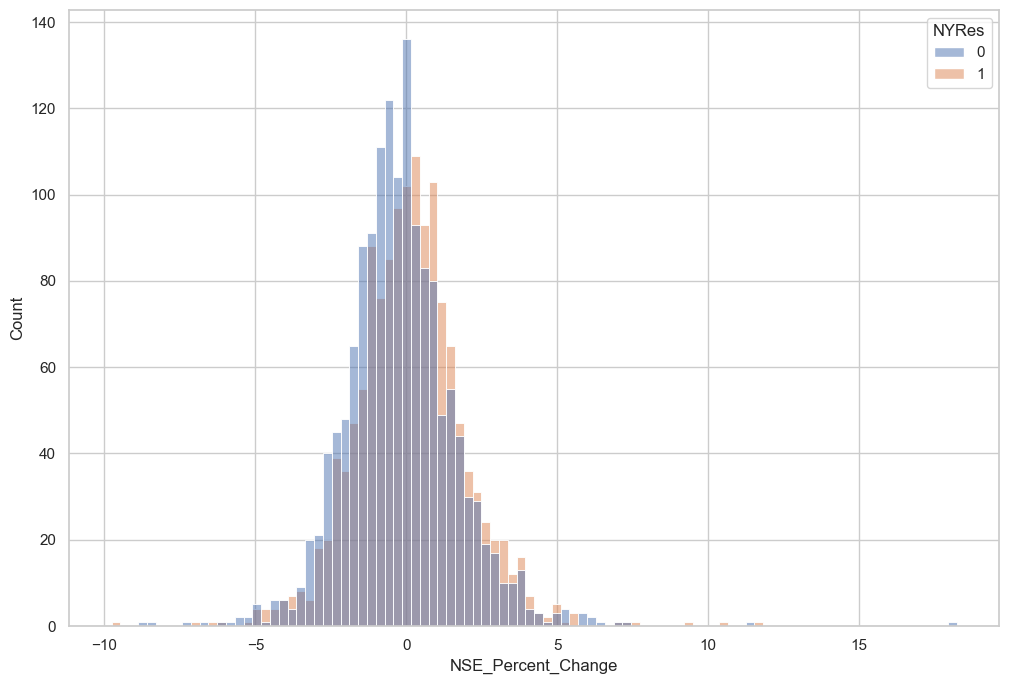

In [42]:
dfIC["NSE_Percent_Change"] = ((dfIC["Close"]-dfIC["Open"])/dfIC["Open"])*100
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(x='NSE_Percent_Change', hue='NYRes', data=dfIC, ax=ax)
plt.show()

In [43]:
dfICM = dfIC.loc[:, ~dfIC.columns.isin(['OpenNY', 'CloseNY', 'NSEDiff', 'NYSEDiff', 'NIFTYDiff', 'NIFTYDiffHL'])]
dfICM = dfICM.dropna()
dfICM

,Date,Open,Close,High,Low,Volume,OpenNIFTY,HighNIFTY,LowNIFTY,CloseNIFTY,NSEDiffHL,NYRes,NSE_Percent_Change
0,2010-01-04,159.454544,159.945450,160.909088,159.090912,9162186.0,5200.899902,5238.450195,5167.100098,5232.200195,1.818176,1,0.307866
1,2010-01-05,161.454544,161.463638,163.590912,160.272720,14659997.0,5277.149902,5288.350098,5242.399902,5277.899902,3.318192,1,0.005633
2,2010-01-06,162.727264,162.699997,164.972733,161.836365,20410054.0,5278.149902,5310.850098,5260.049805,5281.799805,3.136368,0,-0.016756
3,2010-01-07,163.045456,161.163635,163.045456,159.363632,10852286.0,5281.799805,5302.549805,5244.750000,5263.100098,3.681824,0,-1.154170
4,2010-01-08,161.654541,158.899994,161.818176,158.363632,20580934.0,5264.250000,5276.750000,5234.700195,5244.750000,3.454544,0,-1.703971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2021-12-27,724.000000,736.000000,738.750000,716.099976,7955163.0,16937.750000,17112.050781,16833.199219,17086.250000,22.650024,1,1.657459
2870,2021-12-28,740.400024,735.799988,742.450012,732.500000,17833655.0,17177.599609,17250.250000,17161.150391,17233.250000,9.950012,1,-0.621291
2871,2021-12-29,738.000000,735.700012,744.950012,731.900024,7143073.0,17220.099609,17285.949219,17176.650391,17213.599609,13.049988,0,-0.311651
2872,2021-12-30,733.299988,735.700012,740.500000,729.000000,14326182.0,17201.449219,17264.050781,17146.349609,17203.949219,11.500000,1,0.327291


In [44]:
y = dfICM["NYRes"]
x = dfICM.drop(["NYRes", "Date"], axis=1)

In [45]:
#2 Logistic Regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1000)

In [61]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(penalty='none', max_iter=1000)
model_fit = model.fit(x_train, y_train)
model_fit.coef_

array([[ 3.98105570e+00, -8.88036917e+00,  2.47193552e+00,
         2.52468018e+00,  4.62228543e-03, -3.58733573e+00,
        -3.73059745e-01,  5.87272653e+00, -2.05647984e+00,
         2.62419298e-02,  4.13271309e-01]])

In [65]:
model_fit.intercept_

array([-0.05054249])

In [47]:
# Accuracy is sitting at around .55%, which is acceptable
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.5558139534883721


In [66]:
cnfm = confusion_matrix(y_test, y_predict)
print(cnfm)

[[294 162]
 [220 184]]


Text(0.5, 427.9555555555555, 'Predicted label')

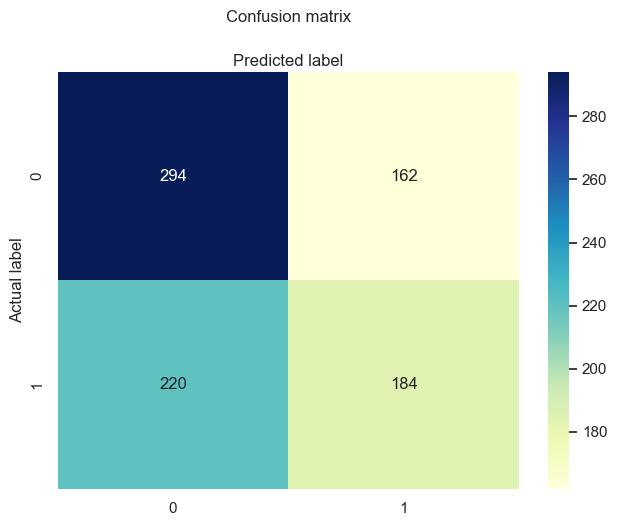

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.64      0.61       456
           1       0.53      0.46      0.49       404

    accuracy                           0.56       860
   macro avg       0.55      0.55      0.55       860
weighted avg       0.55      0.56      0.55       860



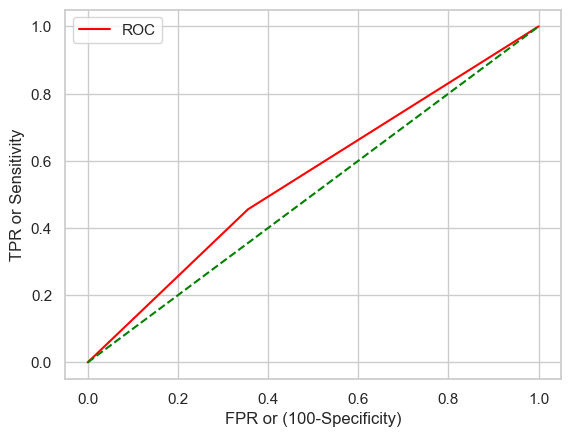

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr, tpr, color='red', label="ROC")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('FPR or (100-Specificity)')
plt.ylabel('TPR or Sensitivity')
plt.legend()
plt.show()

In [103]:
print(roc_auc_score(y_test, y_predict))

0.5500911933298593


In [72]:
#3 Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1000)

model = RandomForestClassifier(random_state=1000)
model.fit(x_train, y_train)
test = model.predict(x_test)

# check accuracy
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")

#Accuracy is low, at about 52.44%

accuracy：52.44186046511628%


In [73]:
fti = model.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

	Open                 : 0.081803
	Close                : 0.085764
	High                 : 0.078925
	Low                  : 0.081952
	Volume               : 0.115273
	OpenNIFTY            : 0.085762
	HighNIFTY            : 0.079754
	LowNIFTY             : 0.082151
	CloseNIFTY           : 0.078202
	NSEDiffHL            : 0.105057
	NSE_Percent_Change   : 0.125356


In [74]:
n_estimators = [int(x) for x in np.linspace(start = 64, stop = 128, num = 8)]
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 2, stop = 3, num = 2)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth,
               'bootstrap': bootstrap}
rf_random = GridSearchCV(estimator=model, param_grid = random_grid, cv = 5)
rf_random.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [64, 73, 82, 91, 100, 109, 118, 128]})

In [75]:
rf_random.best_params_

{'bootstrap': True, 'max_depth': 3, 'max_features': None, 'n_estimators': 82}

In [89]:
rf2 = RandomForestClassifier(n_estimators=82, max_features=None, max_depth=3, bootstrap=True, random_state=1000)
rf2.fit(x_train, y_train)
test = rf2.predict(x_test)
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")

accuracy：56.395348837209305%


In [90]:
fti = rf2.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

	Open                 : 0.034950
	Close                : 0.059701
	High                 : 0.054214
	Low                  : 0.039433
	Volume               : 0.169328
	OpenNIFTY            : 0.064469
	HighNIFTY            : 0.042790
	LowNIFTY             : 0.048105
	CloseNIFTY           : 0.030425
	NSEDiffHL            : 0.083611
	NSE_Percent_Change   : 0.372974


In [116]:
rf2 = RandomForestClassifier(n_estimators=500, max_features=None, max_depth=2, bootstrap=True, random_state=1000)
rf2.fit(x_train, y_train)
test = rf2.predict(x_test)
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")
#A random forest of close to 57% accuracy with max_depth 2 and 500 trees. Seems to be the best the model can do. 

accuracy：56.97674418604651%


In [117]:
cm_test = confusion_matrix(y_test, test)
print(cm_test)
print(classification_report(y_test, test))

[[292 164]
 [206 198]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       456
           1       0.55      0.49      0.52       404

    accuracy                           0.57       860
   macro avg       0.57      0.57      0.56       860
weighted avg       0.57      0.57      0.57       860



Text(0.5, 427.9555555555555, 'Predicted label')

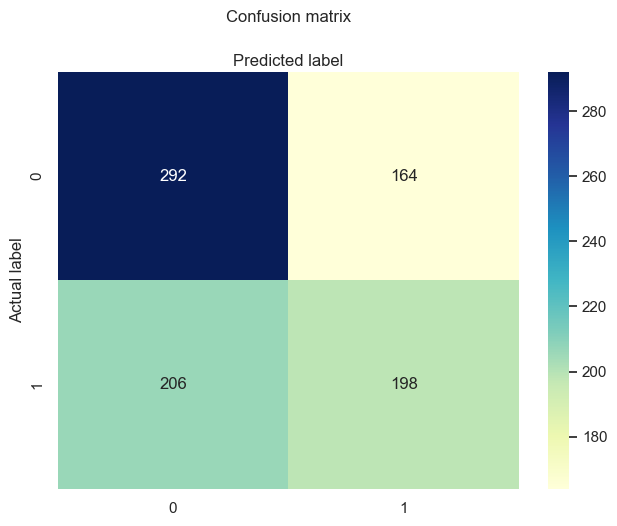

In [118]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

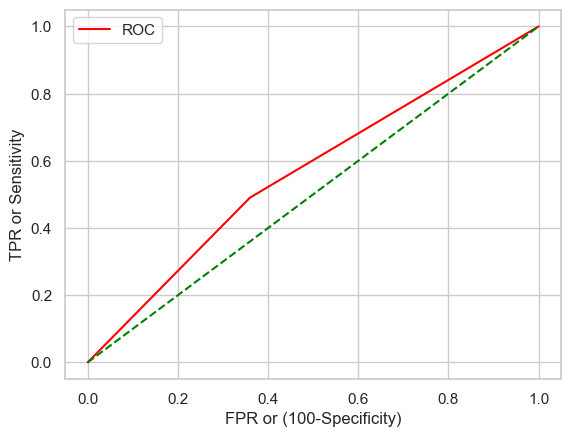

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, test)

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('FPR or (100-Specificity)')
plt.ylabel('TPR or Sensitivity')
plt.legend()
plt.show()

In [105]:
print(roc_auc_score(y_test, test))

0.5652249435469863


In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1000)
gb.fit(x_train, y_train)

print("training accuracy: {:.3f}".format(gb.score(x_train, y_train)))
print("testing accuracy: {:.3f}".format(gb.score(x_test, y_test)))

training accuracy: 0.728
testing accuracy: 0.526


In [107]:
fti = gb.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

	Open                 : 0.057680
	Close                : 0.078946
	High                 : 0.075916
	Low                  : 0.063493
	Volume               : 0.159142
	OpenNIFTY            : 0.063203
	HighNIFTY            : 0.048475
	LowNIFTY             : 0.050166
	CloseNIFTY           : 0.043962
	NSEDiffHL            : 0.107644
	NSE_Percent_Change   : 0.251372


In [108]:
n_estimators = [int(x) for x in np.linspace(start = 64, stop = 128, num = 9)]
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 2, stop = 3, num = 2)]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
grid = {'n_estimators': n_estimators, 
        'max_features': max_features, 
        'max_depth': max_depth,
        'learning_rate': learning_rate}
gb_grid = GridSearchCV(estimator=gb, param_grid = grid, cv = 5)
gb_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1000),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [2, 3], 'max_features': [None, 'sqrt'],
                         'n_estimators': [64, 72, 80, 88, 96, 104, 112, 120,
                                          128]})

In [110]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 88}

In [119]:
gb2 = GradientBoostingClassifier(max_depth=2, n_estimators=88, max_features='sqrt', learning_rate=0.1, random_state=1000)
gb2.fit(x_train, y_train)
test = gb2.predict(x_test)
print("training accuracy: {:.3f}".format(gb2.score(x_train, y_train)))
print("testing accuracy: {:.3f}".format(gb2.score(x_test, y_test)))

training accuracy: 0.640
testing accuracy: 0.542


In [120]:
cm_test = confusion_matrix(y_test, test)
print(cm_test)
print(classification_report(y_test, test))

[[299 157]
 [237 167]]
              precision    recall  f1-score   support

           0       0.56      0.66      0.60       456
           1       0.52      0.41      0.46       404

    accuracy                           0.54       860
   macro avg       0.54      0.53      0.53       860
weighted avg       0.54      0.54      0.54       860



Text(0.5, 427.9555555555555, 'Predicted label')

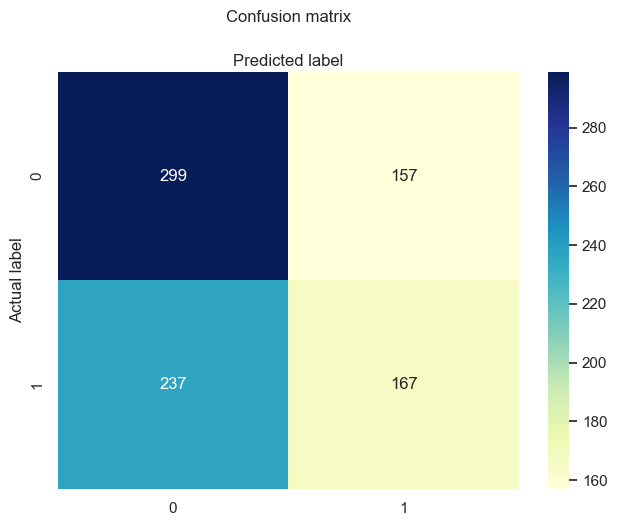

In [121]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

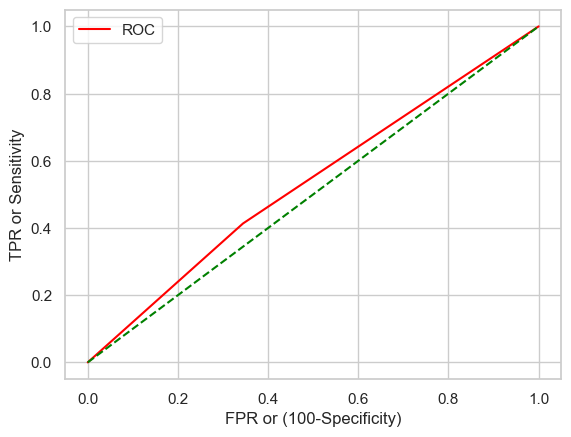

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, test)

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('FPR or (100-Specificity)')
plt.ylabel('TPR or Sensitivity')
plt.legend()
plt.show()

In [113]:
print(roc_auc_score(y_test, test))

0.5345340455098141


In [123]:
dfIC['NSERes'] = dfIC['NSEDiff'].map(lambda x: is_positive(x))
dfIC['NSERes'] = pd.Categorical(dfIC.NSERes)
dfIC

,Date,OpenNY,CloseNY,Open,Close,High,Low,Volume,OpenNIFTY,HighNIFTY,LowNIFTY,CloseNIFTY,NSEDiff,NSEDiffHL,NYSEDiff,NIFTYDiff,NIFTYDiffHL,NYRes,NSE_Percent_Change,NSERes
0,2010-01-04,6.910909,7.047273,159.454544,159.945450,160.909088,159.090912,9162186.0,5200.899902,5238.450195,5167.100098,5232.200195,0.490906,1.818176,0.136364,31.300293,71.350097,1,0.307866,1
1,2010-01-05,6.996364,7.147273,161.454544,161.463638,163.590912,160.272720,14659997.0,5277.149902,5288.350098,5242.399902,5277.899902,0.009094,3.318192,0.150909,0.750000,45.950196,1,0.005633,1
2,2010-01-06,7.096364,7.034545,162.727264,162.699997,164.972733,161.836365,20410054.0,5278.149902,5310.850098,5260.049805,5281.799805,-0.027267,3.136368,-0.061819,3.649903,50.800293,0,-0.016756,0
3,2010-01-07,7.052727,7.018182,163.045456,161.163635,163.045456,159.363632,10852286.0,5281.799805,5302.549805,5244.750000,5263.100098,-1.881821,3.681824,-0.034545,-18.699707,57.799805,0,-1.154170,0
4,2010-01-08,6.938182,6.872727,161.654541,158.899994,161.818176,158.363632,20580934.0,5264.250000,5276.750000,5234.700195,5244.750000,-2.754547,3.454544,-0.065455,-19.500000,42.049805,0,-1.703971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2021-12-27,19.430000,19.490000,724.000000,736.000000,738.750000,716.099976,7955163.0,16937.750000,17112.050781,16833.199219,17086.250000,12.000000,22.650024,0.060000,148.500000,278.851562,1,1.657459,1
2870,2021-12-28,19.500000,19.540001,740.400024,735.799988,742.450012,732.500000,17833655.0,17177.599609,17250.250000,17161.150391,17233.250000,-4.600036,9.950012,0.040001,55.650391,89.099609,1,-0.621291,0
2871,2021-12-29,19.500000,19.430000,738.000000,735.700012,744.950012,731.900024,7143073.0,17220.099609,17285.949219,17176.650391,17213.599609,-2.299988,13.049988,-0.070000,-6.500000,109.298828,0,-0.311651,0
2872,2021-12-30,19.500000,19.650000,733.299988,735.700012,740.500000,729.000000,14326182.0,17201.449219,17264.050781,17146.349609,17203.949219,2.400024,11.500000,0.150000,2.500000,117.701172,1,0.327291,1


In [137]:
dfIC["NY_Percent_Change"] = ((dfIC["CloseNY"]-dfIC["OpenNY"])/dfIC["OpenNY"])*100

In [135]:
x_prac = dfICM.drop(["NYRes"], axis=1)
y_prac = dfICM[[ "Date", "NYRes"]]

In [136]:
#Demo
rf2.predict(x)
y_test2 = pd.DataFrame(y_prac) # convert y_test into dataframe
y_test2['predicted_sign'] = rf2.predict(x)
y_test2
# concat y_test data and predicted y

,Date,NYRes,predicted_sign
0,2010-01-04,1,1
1,2010-01-05,1,0
2,2010-01-06,0,0
3,2010-01-07,0,0
4,2010-01-08,0,0
...,...,...,...
2869,2021-12-27,1,1
2870,2021-12-28,1,0
2871,2021-12-29,0,0
2872,2021-12-30,1,1


In [152]:
dfSIM = y_test2.merge(dfIC[["Date", "NSERes", "NY_Percent_Change", "OpenNY"]], on = "Date")
dfSIM = dfSIM.dropna()
dfSIM

,Date,NYRes,predicted_sign,NSERes,NY_Percent_Change,OpenNY
0,2010-01-04,1,1,1,1.973170,6.910909
1,2010-01-05,1,0,1,2.156963,6.996364
2,2010-01-06,0,0,0,-0.871136,7.096364
3,2010-01-07,0,0,0,-0.489811,7.052727
4,2010-01-08,0,0,0,-0.943403,6.938182
...,...,...,...,...,...,...
2861,2021-12-27,1,1,1,0.308801,19.430000
2862,2021-12-28,1,0,0,0.205133,19.500000
2863,2021-12-29,0,0,0,-0.358974,19.500000
2864,2021-12-30,1,1,1,0.769231,19.500000


In [153]:
dfSIM['rand'] = np.random.randint(0,2,size=(2866, 1))
dfSIM

,Date,NYRes,predicted_sign,NSERes,NY_Percent_Change,OpenNY,rand
0,2010-01-04,1,1,1,1.973170,6.910909,0
1,2010-01-05,1,0,1,2.156963,6.996364,1
2,2010-01-06,0,0,0,-0.871136,7.096364,1
3,2010-01-07,0,0,0,-0.489811,7.052727,1
4,2010-01-08,0,0,0,-0.943403,6.938182,0
...,...,...,...,...,...,...,...
2861,2021-12-27,1,1,1,0.308801,19.430000,0
2862,2021-12-28,1,0,0,0.205133,19.500000,0
2863,2021-12-29,0,0,0,-0.358974,19.500000,1
2864,2021-12-30,1,1,1,0.769231,19.500000,0


In [154]:
dfSIM['Model_Earnings'] = 0
for i in range(0,len(dfSIM.index)):
    if dfSIM['predicted_sign'].iloc[i] == dfSIM['NYRes'].iloc[i]:
        dfSIM['Model_Earnings'].iloc[i] = abs(dfSIM['NY_Percent_Change'].iloc[i])
    elif dfSIM['predicted_sign'].iloc[i] != dfSIM['NYRes'].iloc[i]:
        dfSIM['Model_Earnings'].iloc[i] = -1*abs(dfSIM['NY_Percent_Change'].iloc[i])
        
dfSIM['Strategy_Earnings'] = 0
for i in range(0,len(dfSIM.index)):
    if dfSIM['NSERes'].iloc[i] == dfSIM['NYRes'].iloc[i]:
        dfSIM['Strategy_Earnings'].iloc[i] = abs(dfSIM['NY_Percent_Change'].iloc[i])
    elif dfSIM['NSERes'].iloc[i] != dfSIM['NYRes'].iloc[i]:
        dfSIM['Strategy_Earnings'].iloc[i] = -1*abs(dfSIM['NY_Percent_Change'].iloc[i])

dfSIM['Rand_Earnings'] = 0
for i in range(0,len(dfSIM.index)):
    if dfSIM['rand'].iloc[i] == dfSIM['NYRes'].iloc[i]:
        dfSIM['Rand_Earnings'].iloc[i] = abs(dfSIM['NY_Percent_Change'].iloc[i])
    elif dfSIM['rand'].iloc[i] != dfSIM['NYRes'].iloc[i]:
        dfSIM['Rand_Earnings'].iloc[i] = -1*abs(dfSIM['NY_Percent_Change'].iloc[i])

dfSIM

C:\Users\jeffw\AppData\Local\Temp\ipykernel_19816\1290835259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSIM['Model_Earnings'].iloc[i] = abs(dfSIM['NY_Percent_Change'].iloc[i])
C:\Users\jeffw\AppData\Local\Temp\ipykernel_19816\1290835259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSIM['Strategy_Earnings'].iloc[i] = abs(dfSIM['NY_Percent_Change'].iloc[i])
C:\Users\jeffw\AppData\Local\Temp\ipykernel_19816\1290835259.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Date,NYRes,predicted_sign,NSERes,NY_Percent_Change,OpenNY,rand,Model_Earnings,Strategy_Earnings,Rand_Earnings
0,2010-01-04,1,1,1,1.973170,6.910909,0,1.973170,1.973170,-1.973170
1,2010-01-05,1,0,1,2.156963,6.996364,1,-2.156963,2.156963,2.156963
2,2010-01-06,0,0,0,-0.871136,7.096364,1,0.871136,0.871136,-0.871136
3,2010-01-07,0,0,0,-0.489811,7.052727,1,0.489811,0.489811,-0.489811
4,2010-01-08,0,0,0,-0.943403,6.938182,0,0.943403,0.943403,0.943403
...,...,...,...,...,...,...,...,...,...,...
2861,2021-12-27,1,1,1,0.308801,19.430000,0,0.308801,0.308801,-0.308801
2862,2021-12-28,1,0,0,0.205133,19.500000,0,-0.205133,-0.205133,-0.205133
2863,2021-12-29,0,0,0,-0.358974,19.500000,1,0.358974,0.358974,-0.358974
2864,2021-12-30,1,1,1,0.769231,19.500000,0,0.769231,0.769231,-0.769231


In [157]:
def cumulative_return(df, name, capital):
    comp=[]
    open_price=np.array(df['OpenNY'])
    day_pl=np.array(df[name])
    for i in range(0,len(df)):
        purchase_stock = (capital//open_price[i])*open_price[i]
        capital=(purchase_stock*(1+(day_pl[i]/100)))+(capital-purchase_stock)-0.0005*capital
        comp.append(capital)
    return comp

In [158]:
comp=cumulative_return(dfSIM, 'Model_Earnings', 10000)

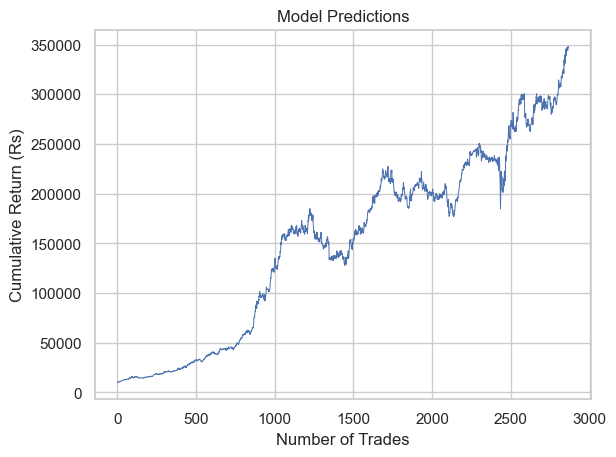

In [162]:
axc=sns.lineplot(data=comp,lw=0.7);
axc.set(xlabel='Number of Trades',
       ylabel='Cumulative Return (Rs)',
       title='Model Predictions');

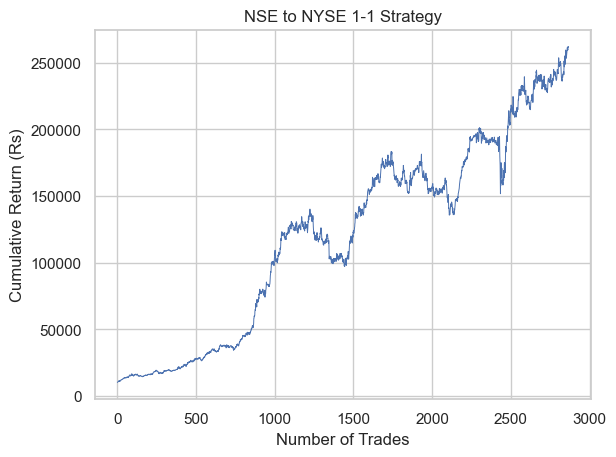

In [163]:
comp_strat=cumulative_return(dfSIM, 'Strategy_Earnings', 10000)
axc=sns.lineplot(data=comp_strat,lw=0.7);
axc.set(xlabel='Number of Trades',
       ylabel='Cumulative Return (Rs)',
       title='NSE to NYSE 1-1 Strategy');

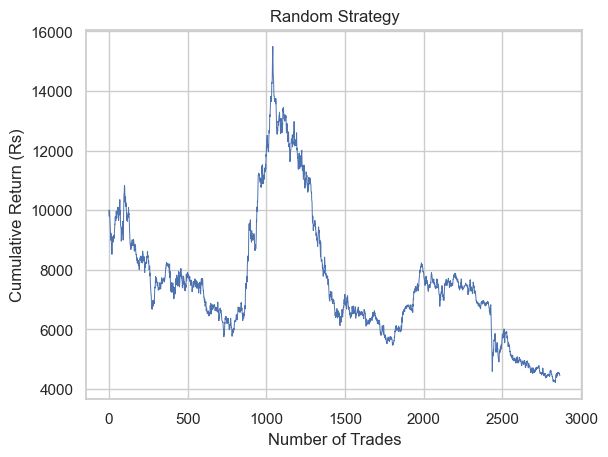

In [164]:
comp_rand=cumulative_return(dfSIM, 'Rand_Earnings', 10000)
axc=sns.lineplot(data=comp_rand,lw=0.7);
axc.set(xlabel='Number of Trades',
       ylabel='Cumulative Return (Rs)',
       title='Random Strategy');